In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy. stats import norm

**1.**Моделировать 1000 реализаций с.в. X ∼ N (0, 1), построить гистограмму. Построить на одном
графике гистограмму и плотность распределения N (0, 1), сравнить их.

In [3]:

# создадим 1000 значений нормально распределенной величины с матожиданием 0 и 1
r = np.random.normal(0, 1, 1000)
df = pd.DataFrame(r)

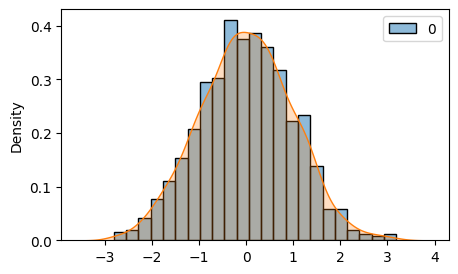

In [4]:
plt.figure(figsize = (5,3))

sns.histplot(df, stat = 'density')
sns.kdeplot(r, fill = True)

plt.show()
None

**2**Для датасета iris определить средние размеры лепестка и чашелистика каждого вида цветов и
среднеквадратическое отклонение каждого вида.

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
# средние значения
mean_sepal_length = df['Sepal.Length'].mean()
mean_sepal_width = df['Sepal.Width'].mean()
mean_petal_length = df['Petal.Length'].mean()
mean_petal_width = df['Petal.Width'].mean()
print(mean_sepal_length, mean_sepal_width, mean_petal_length, mean_petal_width)

5.843333333333334 3.0573333333333337 3.7580000000000005 1.1993333333333336


In [ ]:
#какие виды есть
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df_setosa = df.loc[df['Species'] == "setosa"]
df_versicolor = df.loc[df['Species'] == "versicolor"]
df_virginica = df.loc[df['Species'] == "virginica"]

In [ ]:
R_setosa_sepal_length = 0
for i in df_virginica['Sepal.Length']:
  R_setosa_sepal_length += (i - df_virginica['Sepal.Length'].mean())**2
print(df_virginica['Sepal.Length'].mean())

R_setosa_sepal_width = 0
for i in df_virginica['Sepal.Width']:
  R_setosa_sepal_width += (i - df_virginica['Sepal.Width'].mean())**2
print(df_virginica['Sepal.Width'].mean())

R_setosa_sepal = R_setosa_sepal_length + R_setosa_sepal_width

R_setosa_petal_length = 0
for i in df_virginica['Petal.Length']:
  R_setosa_petal_length += (i - df_virginica['Petal.Length'].mean())**2
print(df_virginica['Petal.Length'].mean())

R_setosa_petal_width = 0
for i in df_virginica['Petal.Width']:
  R_setosa_petal_width += (i - df_virginica['Petal.Width'].mean())**2
print(df_virginica['Petal.Width'].mean())

R_setosa_petal = R_setosa_petal_length + R_setosa_petal_width

R = R_setosa_sepal + R_setosa_petal
print (R_setosa_sepal_length, R_setosa_sepal_width, R_setosa_petal_length,
       R_setosa_petal_width, R_setosa_sepal, R_setosa_petal)

6.587999999999998
2.974
5.5520000000000005
2.0260000000000002
19.812799999999996 5.0962 14.924800000000001 3.696199999999999 24.908999999999995 18.621


**3**. Для датасета HairEyeColor построить столбцовые диаграммы цвета глаз и цвета волос для мужчин и женщин: а) по отдельности, б) на одном графике, сравнить их (здесь потребуется сначала сгрупировать данные).

In [ ]:
df_hair = pd.read_csv('HairEyeColor.csv')
df_hair.head()

,Unnamed: 0,Hair,Eye,Sex,Freq
0,1,Black,Brown,Male,32
1,2,Brown,Brown,Male,53
2,3,Red,Brown,Male,10
3,4,Blond,Brown,Male,3
4,5,Black,Blue,Male,11


In [ ]:
y_hair_w = [sum(df_hair[(df_hair['Hair']==str(value))&(df_hair["Sex"] != "Male")]["Freq"]) for value in df_hair["Hair"].unique()]
y_eye_w = [sum(df_hair[(df_hair['Eye']==str(value))&(df_hair["Sex"] != "Male")]["Freq"]) for value in df_hair["Eye"].unique()]

y_hair_m = [sum(df_hair[(df_hair['Hair']==str(value))&(df_hair["Sex"] == "Male")]["Freq"]) for value in df_hair["Hair"].unique()]
y_eye_m = [sum(df_hair[(df_hair['Eye']==str(value))&(df_hair["Sex"] == "Male")]["Freq"]) for value in df_hair["Eye"].unique()]

[Text(0.5, 1.0, 'Hair_Male')]

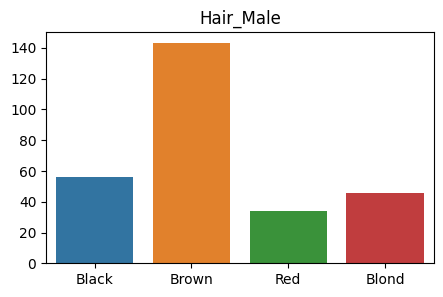

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(x=df_hair["Hair"].unique(), y=y_hair_m).set (title='Hair_Male')

[Text(0.5, 1.0, 'Hair_Female')]

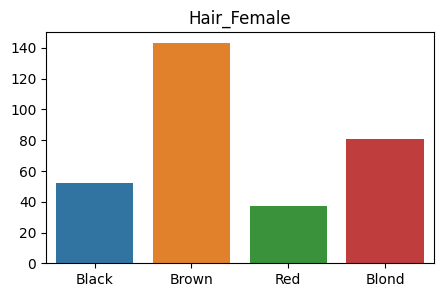

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(x=df_hair["Hair"].unique(), y=y_hair_w).set (title='Hair_Female')

[Text(0.5, 1.0, 'Eye_Male')]

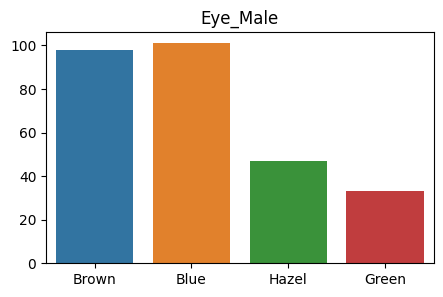

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(x=df_hair["Eye"].unique(), y=y_eye_m).set (title='Eye_Male')

[Text(0.5, 1.0, 'Eye_Female')]

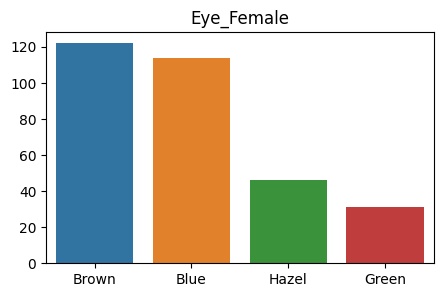

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(x=df_hair["Eye"].unique(), y=y_eye_w).set (title='Eye_Female')

In [ ]:
df_hair_new = pd.DataFrame({'Eye': [i for i in df_hair["Eye"].unique()] + [i for i in df_hair["Eye"].unique()],
                            'Hair': [i for i in df_hair["Hair"].unique()] + [i for i in df_hair["Hair"].unique()],
                            'count_hair': y_hair_m+y_hair_w,
                            'count_eye': y_eye_m+y_eye_w,
                            'Sex': ['M']*4 + ['F']*4
                            })
df_hair_new

,Eye,Hair,count_hair,count_eye,Sex
0,Brown,Black,56,98,M
1,Blue,Brown,143,101,M
2,Hazel,Red,34,47,M
3,Green,Blond,46,33,M
4,Brown,Black,52,122,F
5,Blue,Brown,143,114,F
6,Hazel,Red,37,46,F
7,Green,Blond,81,31,F


[Text(0.5, 1.0, 'Hair_Male_Female')]

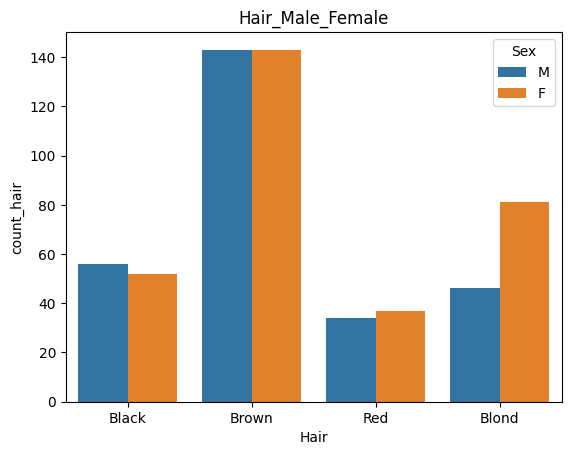

In [ ]:
sns.barplot(x='Hair', y='count_hair', hue = 'Sex', data=df_hair_new).set (title='Hair_Male_Female')

[Text(0.5, 1.0, 'Eye_Male_Female')]

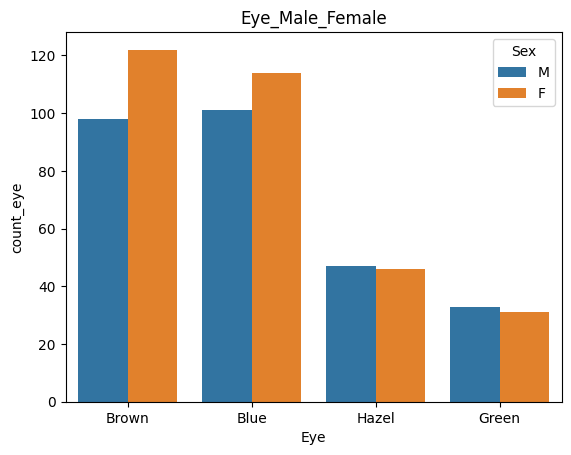

In [ ]:
sns.barplot(x='Eye', y='count_eye', hue = 'Sex', data=df_hair_new).set (title='Eye_Male_Female')

**4.** а) Для датасета penguins (его можно импортировать из seaborn, если Вы пользуетель Python)
построить диаграмму рассеяния длины крыла (flipper length mm) и массы тела (body mass g).

б)
Отразить на графике вид пингвина с помощью цвета и остров с помощью размера.

In [ ]:
df_penguins = pd.read_csv("Penguins.csv")
df_penguins.head(5)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


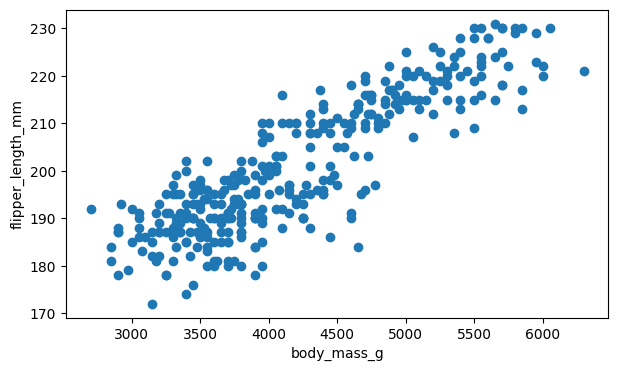

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.scatter(x = df_penguins['body_mass_g'], y = df_penguins['flipper_length_mm'])
plt.xlabel("body_mass_g")
plt.ylabel("flipper_length_mm")

plt.show()

In [ ]:
category_species = df_penguins["species"].unique()
category_island = df_penguins["island"].unique()

colors = [plt.cm.tab10(i/float(len(category_species)-1)) for i in range(len(category_species))]
size = [5*i for i in range(len(category_island))]

In [ ]:
islands = df_penguins['island'].unique()
dot_size = []
for i in range(len(df_penguins)):
  if df_penguins['island'][i] == 'Torgersen':
    dot_size.append(5)
  if df_penguins['island'][i] == 'Biscoe':
    dot_size.append(20)
  if df_penguins['island'][i] == 'Dream':
    dot_size.append(100)

df_penguins['dot_size'] = dot_size

<ipython-input-134-941c6b894d7f>:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter("body_mass_g", "flipper_length_mm",


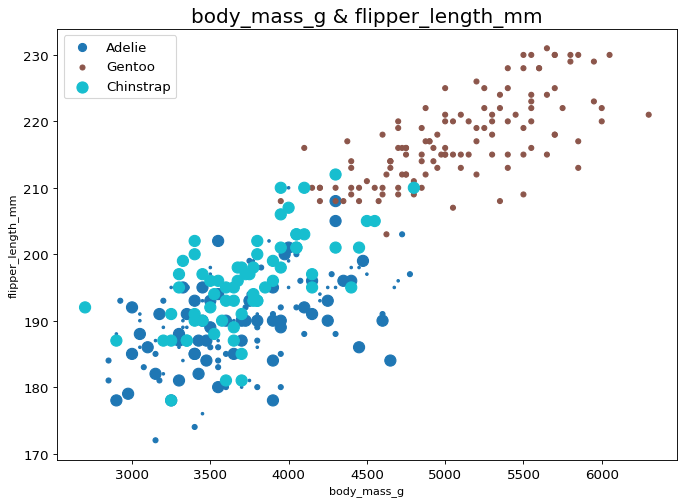

In [ ]:
plt.figure(figsize=(10, 7), dpi=80, facecolor="w", edgecolor="k")
for i, cat in enumerate(category_species):
    plt.scatter("body_mass_g", "flipper_length_mm",
               data=df_penguins.loc[df_penguins.species == cat, :],
                          s = 'dot_size', c=colors[i], label=str(cat))

plt.gca().set(xlabel='body_mass_g', ylabel='flipper_length_mm')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("body_mass_g & flipper_length_mm", fontsize=18)
plt.legend(fontsize=12)
plt.show()

**Для датасета penguins построить набор boxplot() для массы тела по островам обитания.**

<Axes: xlabel='island', ylabel='body_mass_g'>

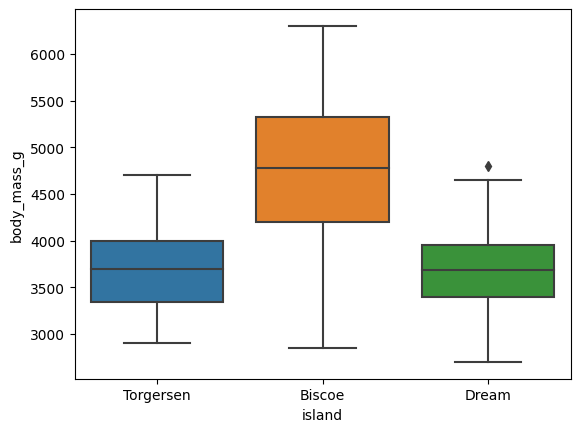

In [ ]:
sns.boxplot(y = 'body_mass_g', x = 'island', data = df_penguins)